In [87]:
import fitsio
from astropy.io import fits
import matplotlib.pyplot as plt
import astropy.table as t
# importing all modules
import os
import fitsio
import matplotlib.pyplot as plt
import glob
from astropy.io import fits
import numpy as np
import astropy.table as t
import subprocess
import json 
import scipy.optimize as so
from scipy.integrate import odeint
import numpy.ma as ma
from scipy.stats import linregress
import pandas as pd
from scipy.stats import binned_statistic as bn
import pickle

In [4]:
# checking which tiles have truth tables
trutab=t.Table.read('/global/cfs/cdirs/desi/sv/vi/TruthTables/Fuji/ELG/220505_ELG_SV1_blanc_and_Fuji_v1.csv')
trutab2=t.Table.read('/global/cfs/cdirs/desi/sv/vi/TruthTables/Fuji/LRG/220505_LRG_SV1_blanc_and_Fuji_v1.csv')
print(np.unique(trutab2['TILEID']))
print(np.unique(trutab['TILEID']))

TILEID
------
 80605
 80609
TILEID
------
 80606
 80608
 80610


In [5]:
#demo tile (filename) taken from Rafaella'S code
# filename='/global/cfs/cdirs/desi/spectro/redux/fuji/tiles/cumulative/80618/20210328/emline-1-80618-thru20210328.fits'

In [6]:
#filenames for tiles with truth tables
emlist=glob.glob('/global/cfs/cdirs/desi/spectro/redux/fuji/tiles/cumulative/80610/*/emline*.fits')

In [7]:
len(emlist)

10

In [8]:
# reading each fits file in emfit output
for filename in emlist:
    emread1= fitsio.FITS(filename)
print(emread1[1].read_header())


XTENSION= 'BINTABLE'           / binary table extension
BITPIX  =                    8 / 8-bit bytes
NAXIS   =                    2 / 2-dimensional binary table
NAXIS1  =                  345 / width of table in bytes
NAXIS2  =                  500 / number of rows in table
PCOUNT  =                    0 / size of special data area
GCOUNT  =                    1 / one data group (required keyword)
TFIELDS =                   80 / number of fields in each row
TTYPE1  = 'TARGETID'           / label for field   1
TFORM1  = 'K'                  / data format of field: 8-byte INTEGER
TTYPE2  = 'Z'                  / label for field   2
TFORM2  = 'D'                  / data format of field: 8-byte DOUBLE
TTYPE3  = 'ZWARN'              / label for field   3
TFORM3  = 'K'                  / data format of field: 8-byte INTEGER
TTYPE4  = 'SPECTYPE'           / label for field   4
TFORM4  = '6A'                 / data format of field: ASCII Character
TTYPE5  = 'DELTACHI2'          / label for f

In [9]:
# reading each fits file in emfit output 2
emtable=t.Table()
for filename in emlist:
    emread2=fits.open(filename)
    dumtable=t.Table.read(emread2[1])
    emtable=t.vstack([dumtable,emtable])

In [10]:
len(emtable)

5000

(array([3897.,    0.,    0.,    0.,    0.,  911.,    0.,    0.,    0.,
         192.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

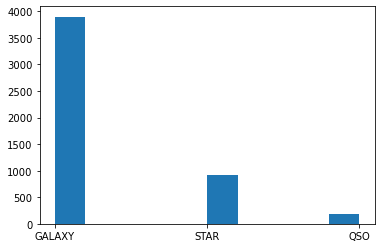

In [13]:
spectype=emtable['SPECTYPE']
zwarn=emtable['ZWARN'][spectype=='GALAXY']
delchi2=emtable['DELTACHI2'][spectype=='GALAXY']
flo2=emtable['OII_FLUX'][spectype=='GALAXY']
sigo2=emtable['OII_SIGMA'][spectype=='GALAXY']
flo3=emtable['OIII_FLUX'][spectype=='GALAXY']
sigo3=emtable['OIII_SIGMA'][spectype=='GALAXY']
ivaro2=emtable['OII_FLUX_IVAR'][spectype=='GALAXY']
ivaro3=emtable['OIII_FLUX_IVAR'][spectype=='GALAXY']
plt.hist(spectype)

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   3.,   1.,  12.,
        526., 434., 267., 153.,  95.,  60.,  45.,  40.,  25.,  16.,  15.,
         15.,  10.,  11.,  10.,   6.,   6.,   7.,   7.,   3.,   3.,   4.,
          2.,   2.,   2.,   2.,   3.,   2.,   2.,   1.,   0.,   1.,   0.,
          3.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   2.,   0.,   1.,
          1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,
          1.,   0.,   0.,   1.,   1., 

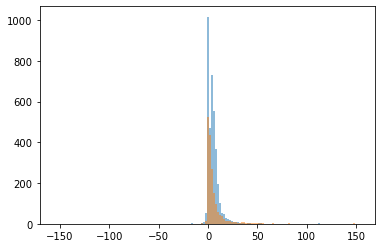

In [14]:
plt.hist(flo2/sigo2,bins=np.arange(-155,155,2),alpha=0.5)
plt.hist(flo3/sigo3,bins=np.arange(-155,155,2),alpha=0.5)

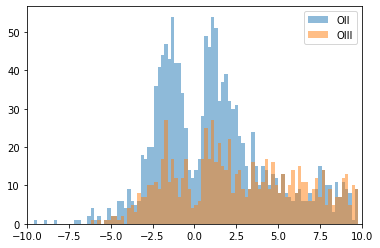

In [15]:
plt.hist(flo2*ivaro2**0.5,bins=np.arange(-10,10,.2),alpha=0.5,label='OII')
plt.hist(flo3*ivaro3**0.5,bins=np.arange(-10,10,.2),alpha=0.5,label='OIII')
plt.xlim(-10,10)
plt.legend()

0.025749423520368946
0.021137586471944657


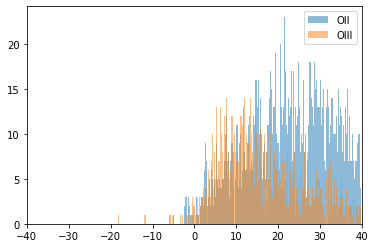

In [16]:
good=(zwarn==0)&(delchi2>40)
plt.hist(flo2[good]*ivaro2[good]**0.5,bins=np.arange(-40,40,.2),alpha=0.5,label='OII')
plt.hist(flo3[good]*ivaro3[good]**0.5,bins=np.arange(-40,40,.2),alpha=0.5,label='OIII')
plt.xlim(-40,40)
plt.legend()
print(np.sum(flo2[good]*ivaro2[good]**0.5<3)/np.sum(good))
print(np.sum(flo3[good]*ivaro3[good]**0.5<3)/np.sum(good))

In [65]:
ivaro2

2.1781898
9.876283
7.379619
8.128761
10.533537
5.6001954
9.061078
0.19983253
2.4820395
0.05031181
12.15505


6
2602


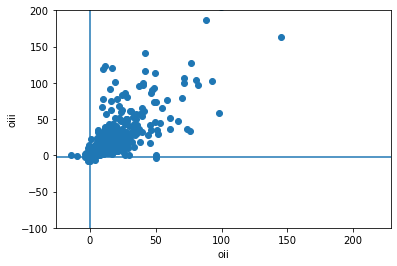

In [75]:
plt.scatter(flo2[good],flo3[good])
# plt.xlim(right=0)
plt.ylim(-100,200)
plt.xlabel('oii')
plt.ylabel('oiii')
plt.axvline(0)
plt.axhline(-3)
print(np.sum((flo2[good]*ivaro2[good]**0.5>-3) & (flo3[good]*ivaro3[good]**0.5<-3)))
print(np.sum(good))


Text(0, 0.5, 'oiii')

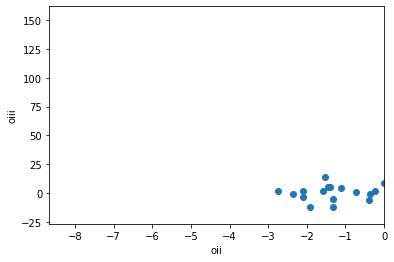

In [70]:
plt.scatter(flo2[good]*ivaro2[good]**0.5,flo3[good]*ivaro3[good]**0.5)
plt.xlim(right=0)
plt.xlabel('oii')
plt.ylabel('oiii')

In [70]:
def read_tile_catalog(tile_string):
    # Read galaxy catalog of a tile including line fit information of all objects
    # input: string with the ID of the tile, e.g. "80605"
    # returns: structured array with catalog of all objects in that tile
    
    emlist = glob.glob('/global/cfs/cdirs/desi/spectro/redux/fuji/tiles/cumulative/'+tile_string+'/*/emline*.fits')
    emtable = t.Table()
    for filename in emlist:
        emread2=fits.open(filename)
        dumtable=t.Table.read(emread2[1])
        emtable=t.vstack([dumtable,emtable])
    
    return emtable

def filter_galaxies(catalog):
    # Filter catalog to only include galaxy targets, return the filtered catalog
    return catalog[catalog['SPECTYPE']=='GALAXY']

def filter_good_fits(catalog, deltachi2=40):
    # Filter catalog to only include targets with no ZWARN flag and good deltachi2
    
    good = (catalog['ZWARN'] == 0) & (catalog['DELTACHI2']>deltachi2)
    return catalog[good]

def calculate_oii_oiii_matrix(catalog, oIIlimit=-3, oIIIlimit=-3):
    
    # return normalized matrix of whether OII and OIII fluxes are or are not compatible with physical fit
    
    matrix = np.zeros(4)
    # ordered as 'OII good, OIII good', 'good, bad', 'bad, good', 'bad, bad' where bad means the significance of the respective flux is smaller than the limit passed to the function
    
    select = (catalog['OII_FLUX']*catalog['OII_FLUX_IVAR']**0.5 > oIIlimit) & (catalog['OIII_FLUX']*catalog['OIII_FLUX_IVAR']**0.5 > oIIIlimit)
    matrix[0] = np.sum(select)
    
    select = (catalog['OII_FLUX']*catalog['OII_FLUX_IVAR']**0.5 > oIIlimit) & (catalog['OIII_FLUX']*catalog['OIII_FLUX_IVAR']**0.5 <= oIIIlimit)
    matrix[1] = np.sum(select)
    
    select = (catalog['OII_FLUX']*catalog['OII_FLUX_IVAR']**0.5 <= oIIlimit) & (catalog['OIII_FLUX']*catalog['OIII_FLUX_IVAR']**0.5 > oIIIlimit)
    matrix[2] = np.sum(select)
    
    select = (catalog['OII_FLUX']*catalog['OII_FLUX_IVAR']**0.5 <= oIIlimit) & (catalog['OIII_FLUX']*catalog['OIII_FLUX_IVAR']**0.5 <= oIIIlimit)
    matrix[3] = np.sum(select)
    
    return matrix/np.sum(matrix)


def plot_matrices(matrices):
    
    matrices = np.array(matrices)
    
    # plt.hist(matrices[:,0], label="good OII & OIII",color='blue') hidden because we expect it to be -> 1
    plt.hist(matrices[:,1], label="good OII, bad OIII",bins=(np.linspace(0,0.1,100)),alpha=0.5)
    plt.hist(matrices[:,2], label="bad OII, good OIII",bins=(np.linspace(0,0.1,100)),alpha=0.5)
    plt.hist(matrices[:,3], label="bad OII & OIII",bins=(np.linspace(0,0.1,100)),alpha=0.5)
    plt.legend()
    plt.xlabel('fraction of galaxies')

def plot_matrices(catalog):
    
    matrices = np.array(matrices)
    plt.scatter()


In [71]:
tiles=["80653","80654","80655","80656","80657","80658","80659","80660","80661","80662","80663","80664","80665","80666","80669","80670","80673","80674","80675","80676","80677","80678","80679","80680","80681","80682","80683","80684","80685","80686","80687","80688","80689","80690","80691","80692","80693","80694","80695","80696","80697","80698","80699","80700","80701","80702","80703","80705","80706","80707","80708","80709","80710","80711","80712","80715","80718","80719","80720","80721","80722","80724","80726","80728","80729","80730","80731","80732","80733","80734","80735","80736","80737","80738","80740","80741","80742","80782","80783","80784","80785","80786","80787","80788","80789","80790","80856","80857","80858","80859","80860","80861","80862","80863","80865","80866","80867","80869","80870","80871","80872","80873","80875","80876","80879","80882","80885","80886","80887","80888","80889","80890","80891","80892","80893","80894","80895","80896","80897","80898","80899","80900","80901","80902","80938","80944","80949","80950","80951","80952","80954","80955","80956","80958","80959","80960","80962","80963","80966","80968","80970","80971","80972","80974","80975","81000","81001","81002","81003","81004","81005","81006","81007","81008","81009","81010","81011","81012","81013","81014","81015","81022","81056","81057","81058","81059","81060","81061","81062","81063","81064","81065","81066","81067","81068","81069","81072","81073","81074","81075","81088","81097","81098","81099","81100","81101","81102","81103","81104","81105","81106","81107","81108","81109","81110","81111","81112","81113","81114","81115"]
# tiles=['81115'] # if you want to test a particular file

80653
80654
80655
80656
80657
80658
80659
80660
80661
80662
80663
80664
80665
80666
80669
80670
80673
80674
80675
80676
80677
80678
80679
80680
80681
80682
80683
80684
80685
80686
80687
80688
80689
80690
80691
80692
80693
80694
80695
80696
80697
80698
80699
80700
80701
80702
80703
80705
80706
80707
80708
80709
80710
80711
80712
80715
80718
80719
80720
80721
80722
80724
80726
80728
80729
80730
80731
80732
80733
80734
80735
80736
80737
80738
80740
80741
80742
80782
80783
80784
80785
80786
80787
80788
80789
80790
80856
80857
80858
80859
80860
80861
80862
80863
80865
80866
80867
80869
80870
80871
80872
80873
80875
80876
80879
80882
80885
80886
80887
80888
80889
80890
80891
80892
80893
80894
80895
80896
80897
80898
80899
80900
80901
80902
80938
80944
80949
80950
80951
80952
80954
80955
80956
80958
80959
80960
80962
80963
80966
80968
80970
80971
80972
80974
80975
81000
81001
81002
81003
81004
81005
81006
81007
81008
81009
81010
81011
81012
81013
81014
81015
81022
81056
81057
81058
81059
8106

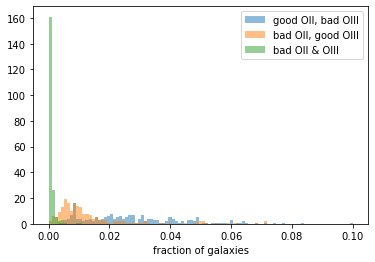

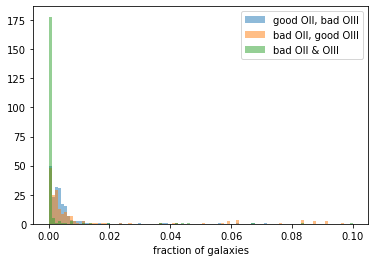

In [72]:

matrices = []
matrices_good=[]

for tile in tiles:
    print(tile)
    catalog = read_tile_catalog(tile)
    catalog = filter_galaxies(catalog)
    matrices.append(calculate_oii_oiii_matrix(catalog))
    plot_oiioiiicorrelation(catalog)
    catalog = filter_good_fits(catalog)
    matrices_good.append(calculate_oii_oiii_matrix(catalog))
    
plot_matrices(matrices)
plt.figure()
plot_matrices(matrices_good)

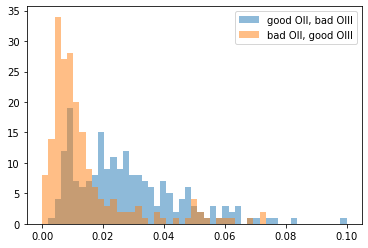

In [81]:
matricesdum = np.array(matrices)
plt.hist(matricesdum[:,1], label="good OII, bad OIII",bins=(np.linspace(0,0.1,50)),alpha=0.5)
plt.hist(matricesdum[:,2], label="bad OII, good OIII",bins=(np.linspace(0,0.1,50)),alpha=0.5)
plt.legend()

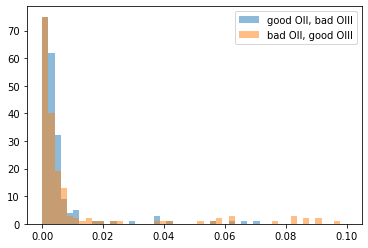

In [84]:
matricesgooddum = np.array(matrices_good)
plt.hist(matricesgooddum[:,1], label="good OII, bad OIII",bins=(np.linspace(0,0.1,50)),alpha=0.5)
plt.hist(matricesgooddum[:,2], label="bad OII, good OIII",bins=(np.linspace(0,0.1,50)),alpha=0.5)
plt.legend()

In [93]:
# An arbitrary collection of objects supported by pickle.
data = {'matrix from all the tiles Dr. Daniel': matrices,
    'Good Matrix from all the tiles Dr. Daniel provided': matrices_good}
with open('data.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)


In [94]:
with open('data.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    data = pickle.load(f)

In [10]:
# determine pull distribution of OIII and OII lines in the data

tiles = [80618]
nights = [20210328]

def read_redrock_cat(tile,night):
    # read redrock catalog of given tile, night
    return None

def read_emlinefit_cat(tile,night):
    return None

def select_all_galaxies(redrock_cat):
    # return indices of all galaxy fibers (see Raffaella's notebook)
    return []

def select_good_galaxies(redrock_cat):
    # return indices of all high fidelity redshift galaxy fibers (see Raffaella's notebook)
    return []

pulls_oIII = []
pulls_oIII_good = []
pulls_oII  = []
pulls_oII_good = []

for tile,night in zip(tiles,nights):
    redrock_cat = read_redrock_cat(tile,night)
    emlinefit_cat = read_emlinefit_cat(tile,night)
    
    all_galaxies = select_all_galaxies(redrock_cat)
    good_galaxies = select_good_galaxies(redrock_cat)
    
    pulls_oIII.append(emlinefit_cat[all_galaxies]['OIII_FLUX']/emlinefit_cat[all_galaxies]['OIII_SIGMA'])
    # and four more like this for the other pulls
    # may or may not have to subtract the continuum (also in the catalog) from the flux - best may be to look at emlinefit code
    
plt.hist(pulls_oIII)
# add a Gaussian here to the histogram, normalized by twice the number of negative pulls

# and three more
    
plt.scatter(pulls_oIII,pulls_oII)
# maybe fit an ellipse == determine the covariance of these two quantities, maybe just from the negative side (ignoring cases where both are positive?)
# the fact that the oII penalty is already in effect limits the usefulness of this test
# (but maybe the oII penalty is not implemented right)

# if this test shows a significant population of negative OIII outliers that are not also OII outliers,
# that is clear indication we can gain by dealing with that in the fit

# if this test does not show that, the next test may be to do the same on the model (which could show that the model is unphysical, even without coincidence of absorption lines in the data and oIII wavelength in the fit)



TypeError: 'NoneType' object is not subscriptable